In [56]:
import numpy as np
quantiles = [1.0, 0.5, 0.1]
MCMC_PATH = "/Users/antoineluciano/Documents/Recherche/ABC-SBI-1/abcnre/examples/cli_gk/results/mcmc/"
true_datas = np.load(MCMC_PATH + "mcmc_true.npz", allow_pickle=True)
all_datas = {}
for quantile in quantiles:
    all_datas[quantile] = {}
    for marginal in [0,1,2,3,-1]:
        all_datas[quantile][marginal] = np.load(MCMC_PATH + f"mcmc_marginal_{marginal}_quantile_{quantile}.npz", allow_pickle=True)


In [59]:
all_datas[quantile][-1].files

['nre_standard', 'nre_corrected']

In [49]:
def get_samples(data, method, n_samples = 10000):
    samples =  dict(data[method].item())["samples"]
    n_total_samples = samples.shape[0]
    return samples[::n_total_samples // n_samples]

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

true_samples = get_samples(true_datas, "true_posterior", n_samples=10000)

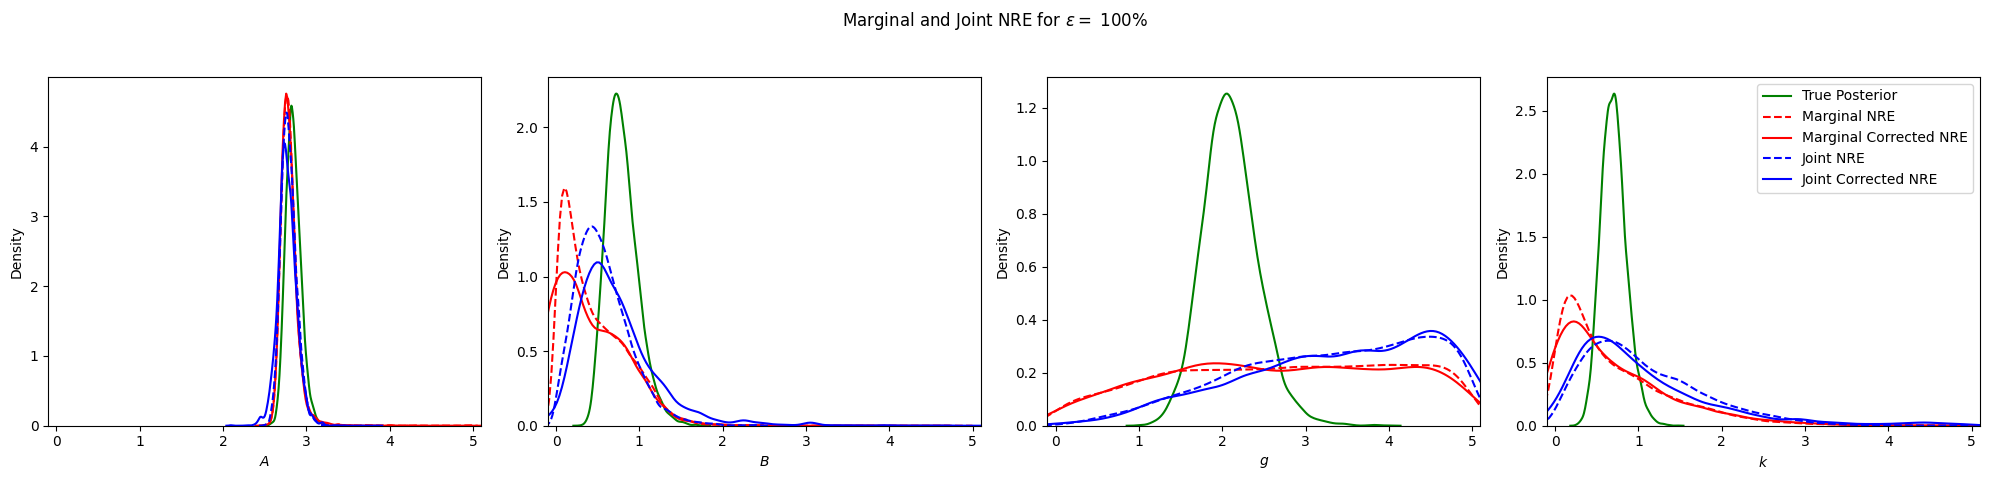

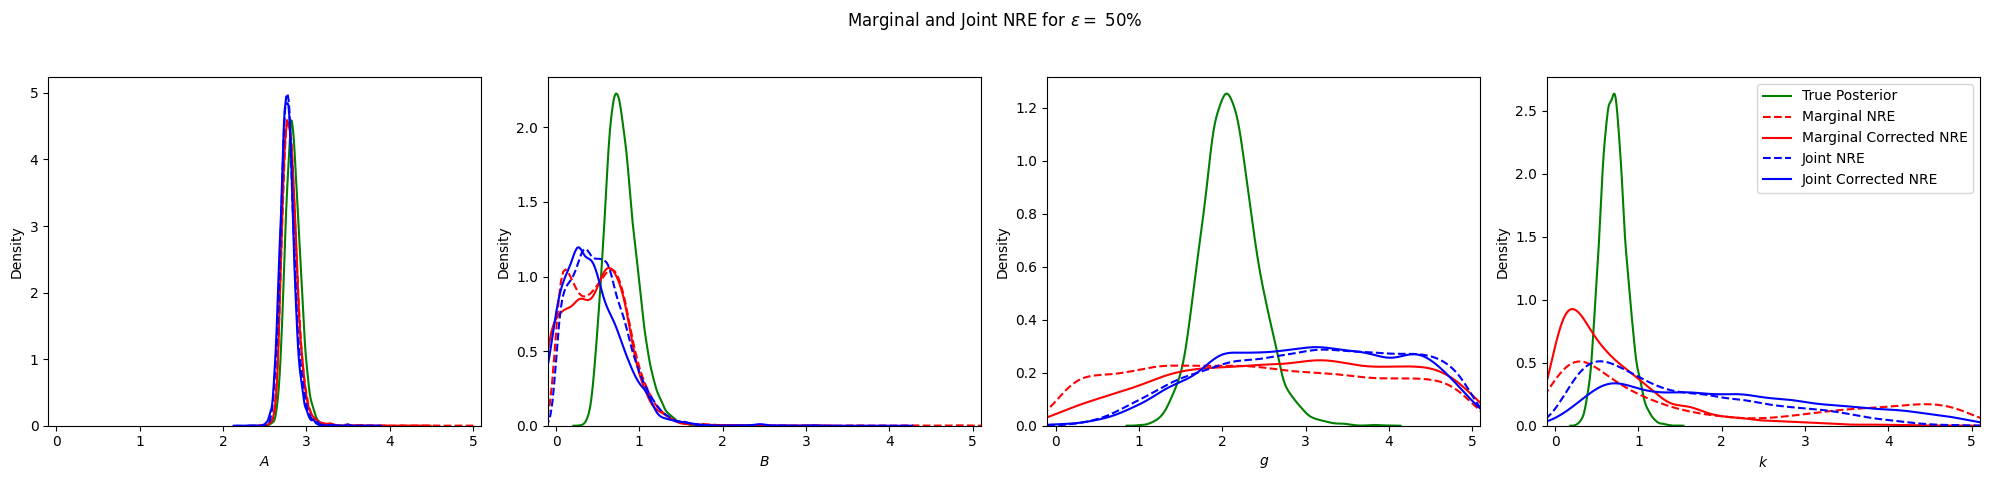

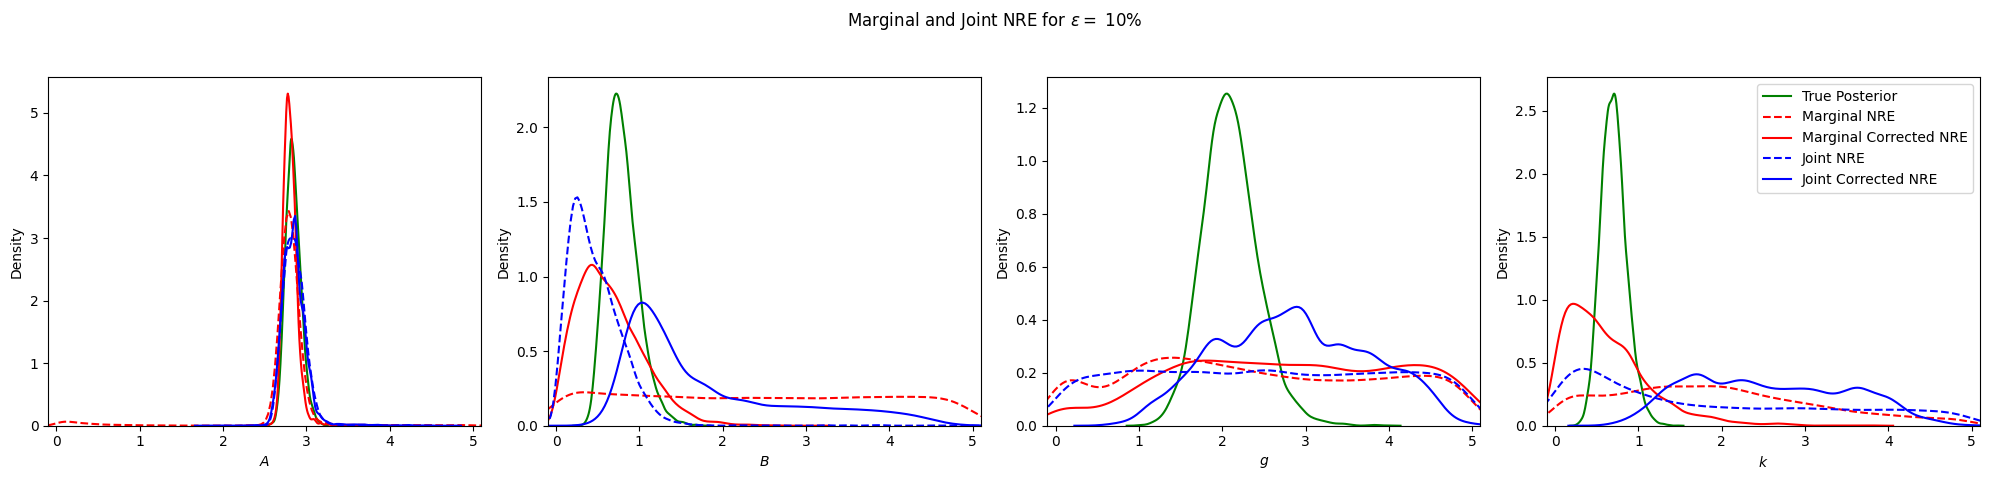

In [74]:
par_names = ["$A$", "$B$", "$g$", "$k$"]
for quantile in quantiles:
    f, ax = plt.subplots(1,4, figsize=(20, 5))
    joint_nre = get_samples(all_datas[quantile][-1], "nre_standard", n_samples=10000)
    joint_correct_nre = get_samples(all_datas[quantile][-1], "nre_corrected", n_samples=10000)
    for i in range(4):
        sns.kdeplot(true_samples[:, i], ax=ax[i], label="True Posterior", color = "green")
        sns.kdeplot(get_samples(all_datas[quantile][i], "nre_standard", n_samples=10000).flatten(), ax=ax[i], label=f"Marginal NRE", color = "red", linestyle="--")
        sns.kdeplot(get_samples(all_datas[quantile][i], "nre_corrected", n_samples=10000).flatten(), ax=ax[i], label=f"Marginal Corrected NRE", color="red")
        sns.kdeplot(joint_nre[:, i], ax=ax[i], label="Joint NRE", color="blue", linestyle="--")
        sns.kdeplot(joint_correct_nre[:, i], ax=ax[i], label="Joint Corrected NRE", color="blue")
    for i in range(4):
        ax[i].set_xlim(-0.1, 5.1)
        ax[i].set_xlabel(par_names[i])
    plt.suptitle(f"Marginal and Joint NRE for $\epsilon =$ {quantile:.0%}")
    plt.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"results/plots/marginal_joint_gk_quantile_{quantile}.png")
    
    plt.show()
